# Roll the dice 10 times
The dice have six sides, so the probability of any outcome would be p = 1/6. This is simple. If we repeat it multiple times, say 200 times, and take the average, the probability will be p = 1/6.

But how about we throw it 10 times? What is the probability that any outcome of the dice ( 1,2,3,4,5 or 6) will come out one time, twice, or five times? When we do it with the coin, we throw it 10 times, and we intuitively know that the probability that heads will come out 5 times is the highest rather than any outcome (5 heads events have a higher probability than 4 heads, 6 heads, or 7 heads).

It is different with dice. It has six outcomes, so the probability is p = 1/6. But I can't tell which probability is highest. Intuitively, it should be between 1 and 5.

The harder problem is the value of each probability. For example, what is the probability that in a 10-times dice-rolling event, the outcome 1 will occur five times?
This is the problem of binomial probability distribution. We don't have a ready-made answer in our heads because it is actually more complex than it looks. The codes below are my attempt to calculate and understand binomial distributions with dice problems.

In [1]:
# import the library
import random
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [15]:
# generate dice rolling event -->the outcome is [1,2,3,4,5,6]
# the outcome is random

def single_dice():
    return random.randint(1,6)

In [196]:
# create a function using desired outcome and rolls count
# desired_outcome: desired outcome per one event (outcome of the dice number 1 of the 6 outcomes)
# rolls_count: the number of dice rolling 
# the function will return the number of desired outcome event happened 

def dice(desired_outcome, rolls_count):
    result = 0
    for i in range(rolls_count):
        if single_dice() == desired_outcome:
            result = result + 1
    return result
    
# repeat the event multiple time 
# number of trials, n: number of events made (for below 1,2,3,4 ..... 1000 times)
# data: the number of desired outcome occurs, k under the number of trials, n

def search_prob(number_of_trials):
    outcome = []
    for j in range(number_of_trials):
        outcome.append(dice(1,10)) # this will result in the number of desired outcome come up in an event of 10 times dice rolling , it can be 0,1,2,3,4,5 ... 9 ,10
    return outcome
# for number of events n, calculate the number of desired outcome (1 in the dice) occurred : k
# then divide it with the number of events, n  to get the probability: k / n

dice_result = np.arange(0,10+1)
probability = []
for k in dice_result:
    data = [x for x in search_prob(10000) if x == k]
    probability.append(len(data)/10000)

df = pd.DataFrame(probability,dice_result,columns=['Experiment Probability'])

In [202]:
# we can calculate the theoretical value based on binomial distibution function
# this return the probability of 1,2,3... 9 ,10 of desired outcome
import math
theoretical_value = []
for i in range(0,10+1):
    p = math.comb(10,i) * ((1/6) ** i) * ((1 - 1/6) ** (10-i))
    theoretical_value.append(p)
df1 = pd.DataFrame(theoretical_value,dice_result,columns=['Theoretical Probability'])
print(df1)
print(df)

    Theoretical Probability
0              1.615056e-01
1              3.230112e-01
2              2.907100e-01
3              1.550454e-01
4              5.426588e-02
5              1.302381e-02
6              2.170635e-03
7              2.480726e-04
8              1.860544e-05
9              8.269086e-07
10             1.653817e-08
    Experiment Probability
0                   0.1552
1                   0.3249
2                   0.2952
3                   0.1586
4                   0.0578
5                   0.0123
6                   0.0023
7                   0.0004
8                   0.0000
9                   0.0000
10                  0.0000


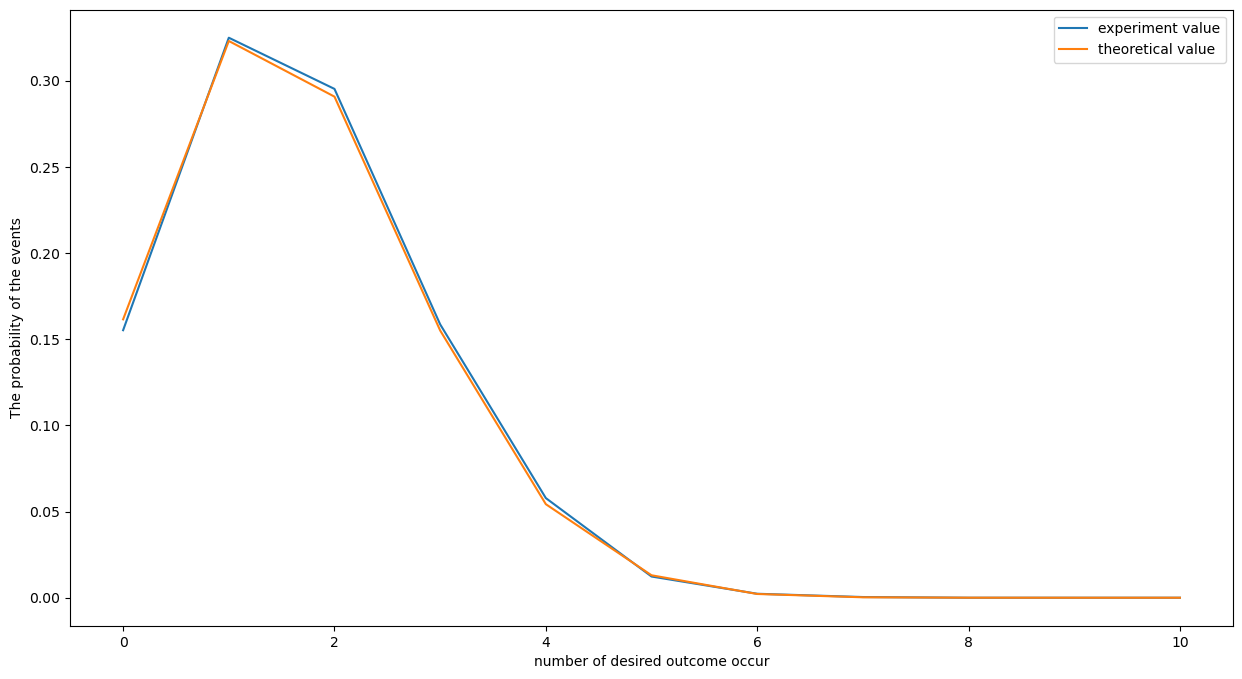

In [203]:
plt.figure(figsize = (15,8))
plt.plot(df, label = 'experiment value')
plt.plot(df1, label = 'theoretical value')
plt.xlabel('number of desired outcome occur')
plt.ylabel('The probability of the events')
plt.legend()

Note:

When we throw the dice 10 times, the probability that the desired outcome will occur is as above. The number of occurrences 1 has the highest probability. Although I intuitively know that the probability is most likely high in the number of occurances between 1 and 5, I could not make out that the number of occurances 1 has the highest probability.

As expected, it is most likely impossible that if we throw the dice 10 times, the same outcome will appear 8, 9, or 10 times. This is logical; even the probability that the same outcome appears five times is relatively low.

Note that the probability that the desired outcome will occur one time is higher than zero times. This looks simple, but maybe the mathematics behind it is complex and confusing.